In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

# Customers data

In [3]:
customers_df=pd.read_csv('customers.csv')
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
customers_df.shape

(1371980, 7)

In [5]:
customers_df.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [6]:
customers_df.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


# Articles data

In [7]:
articles_df=pd.read_csv('articles.csv')
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [8]:
articles_df.shape

(105542, 25)

In [9]:
articles_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [10]:
articles_df.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


# Transactions data

In [11]:
transactions_df=pd.read_csv('transactions_train.csv')
transactions_df.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [12]:
transactions_df.shape

(31788324, 5)

In [13]:
transactions_df.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [14]:
transactions_df.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


# EDA Customers

In [15]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [16]:
customers_df.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [17]:
print(customers_df.dtypes)

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object


In [18]:
print(customers_df['FN'].unique())
print(customers_df['Active'].unique())
print(customers_df['age'].unique())

[nan  1.]
[nan  1.]
[49. 25. 24. 54. 52. nan 20. 32. 29. 31. 56. 75. 41. 27. 30. 48. 35. 22.
 40. 38. 45. 68. 55. 19. 60. 44. 21. 26. 28. 53. 33. 17. 23. 51. 18. 34.
 57. 47. 70. 50. 63. 58. 43. 67. 72. 42. 39. 79. 71. 59. 36. 62. 37. 46.
 73. 64. 74. 61. 85. 69. 76. 66. 65. 82. 16. 90. 80. 78. 81. 84. 77. 97.
 89. 83. 98. 88. 86. 87. 93. 91. 99. 96. 94. 92. 95.]


In [19]:
customers_df['FN'] = customers_df['FN'].astype(float).fillna(0).astype(int)
customers_df['Active'] = customers_df['Active'].astype(float).fillna(0).astype(int)

In [20]:
mean_age=customers_df['age'].mean()
customers_df['age']=customers_df['age'].fillna(mean_age)
customers_df['age'] = customers_df['age'].astype(int)

In [21]:
max_age = customers_df['age'].max()
bin_size = max_age / 19
print(bin_size)

bins = [i * bin_size for i in range(19)]
print(bins)

5.2105263157894735
[0.0, 5.2105263157894735, 10.421052631578947, 15.631578947368421, 20.842105263157894, 26.052631578947366, 31.263157894736842, 36.473684210526315, 41.68421052631579, 46.89473684210526, 52.10526315789473, 57.315789473684205, 62.526315789473685, 67.73684210526315, 72.94736842105263, 78.1578947368421, 83.36842105263158, 88.57894736842105, 93.78947368421052]


In [22]:
df = customers_df.copy()

In [23]:
df['age_bins'] = pd.cut(df['age'], bins)


In [24]:
df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_bins
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,"(46.895, 52.105]"
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,"(20.842, 26.053]"
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,"(20.842, 26.053]"
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,"(52.105, 57.316]"
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,"(46.895, 52.105]"


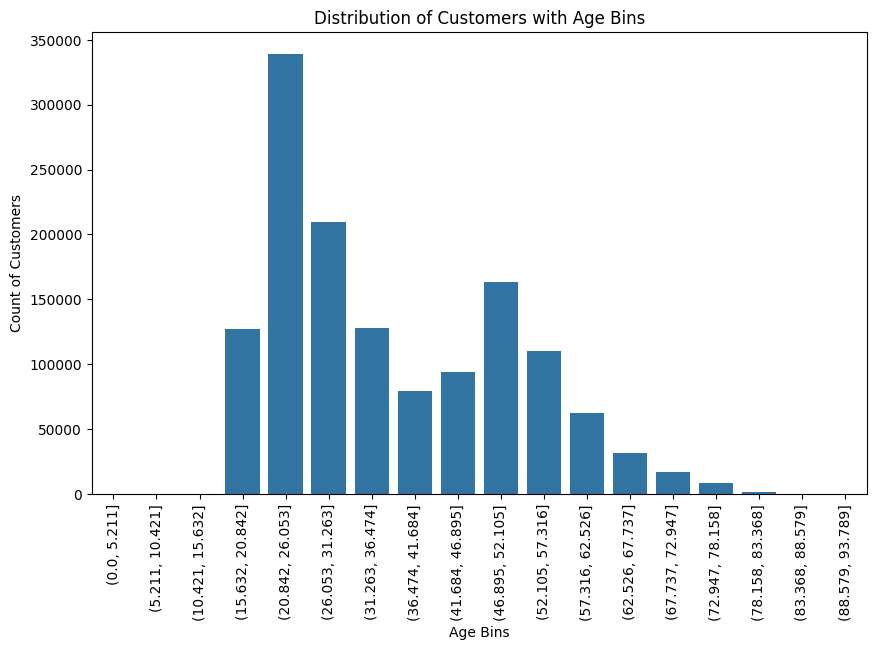

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_bins', data=df)
plt.title('Distribution of Customers with Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count of Customers')
plt.xticks(rotation=90)
plt.show()


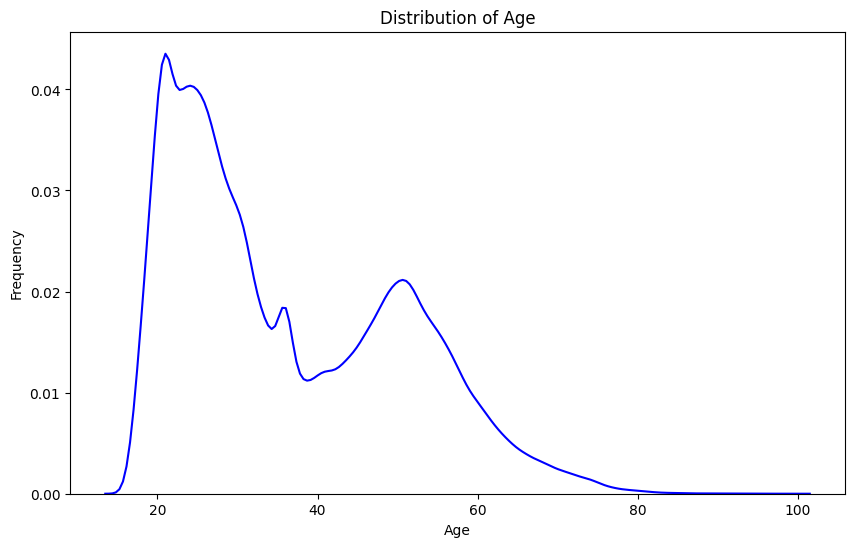

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age',color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [27]:
df.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'age_bins'],
      dtype='object')

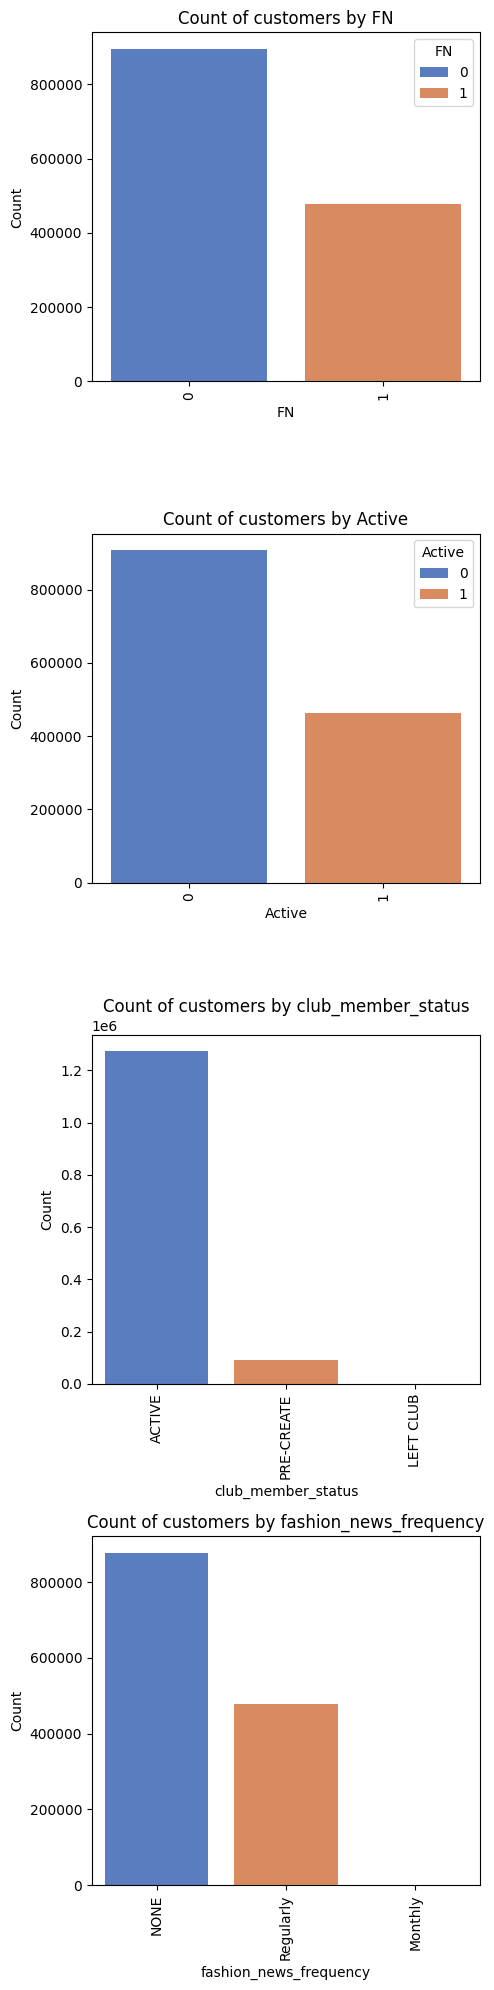

In [28]:
# count of customers for different FN,Active,fashion_news_frequency,club_member_status
columns = ['FN', 'Active', 'club_member_status',
       'fashion_news_frequency']

fig, axs = plt.subplots(len(columns), 1, figsize=(5, 5*len(columns)))
#fig, axs = plt.subplots(1, len(columns), figsize=(6*len(columns), 6))

for i, column in enumerate(columns):
    counts = df[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axs[i],hue=counts.index, palette='muted')
    axs[i].set_title(f'Count of customers by {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# EDA Articles

In [29]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [30]:
print(articles_df['prod_name'].nunique())
print(articles_df['prod_name'].unique())

45875
['Strap top' 'Strap top (1)' 'OP T-shirt (Idro)' ... 'Cartwheel dress'
 'CLAIRE HAIR CLAW' 'Lounge dress']


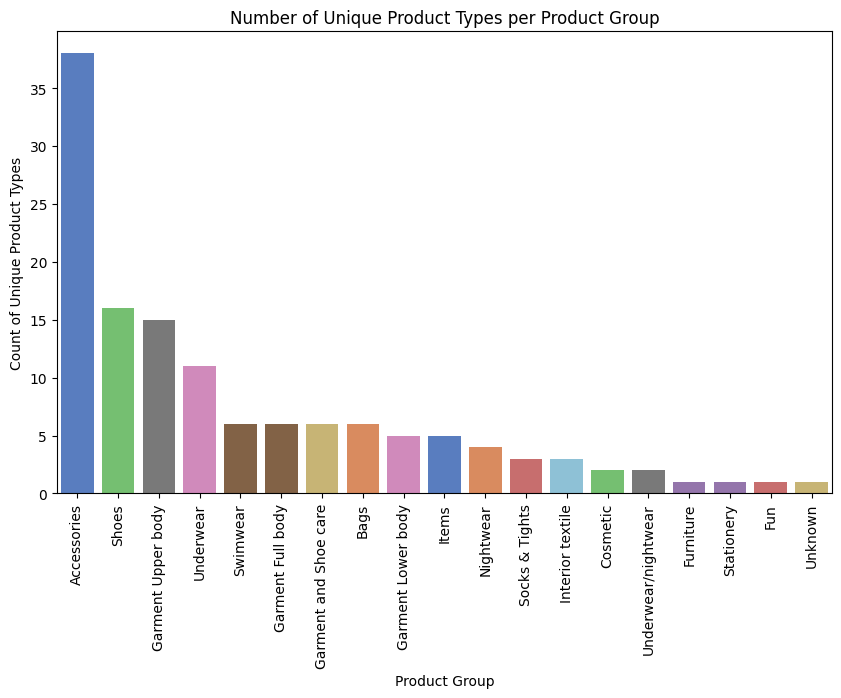

In [31]:
# Group by product_group_name and calculate the number of unique product_type_name
grouped_counts = articles_df.groupby("product_group_name")["product_type_name"].nunique().reset_index()

grouped_counts = grouped_counts.sort_values(by="product_type_name", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="product_group_name", y="product_type_name", data=grouped_counts,hue=grouped_counts.index, palette='muted')
plt.title('Number of Unique Product Types per Product Group')
plt.xlabel('Product Group')
plt.ylabel('Count of Unique Product Types')
plt.xticks(rotation=90)
plt.legend().remove()
plt.show()


In [32]:
articles_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

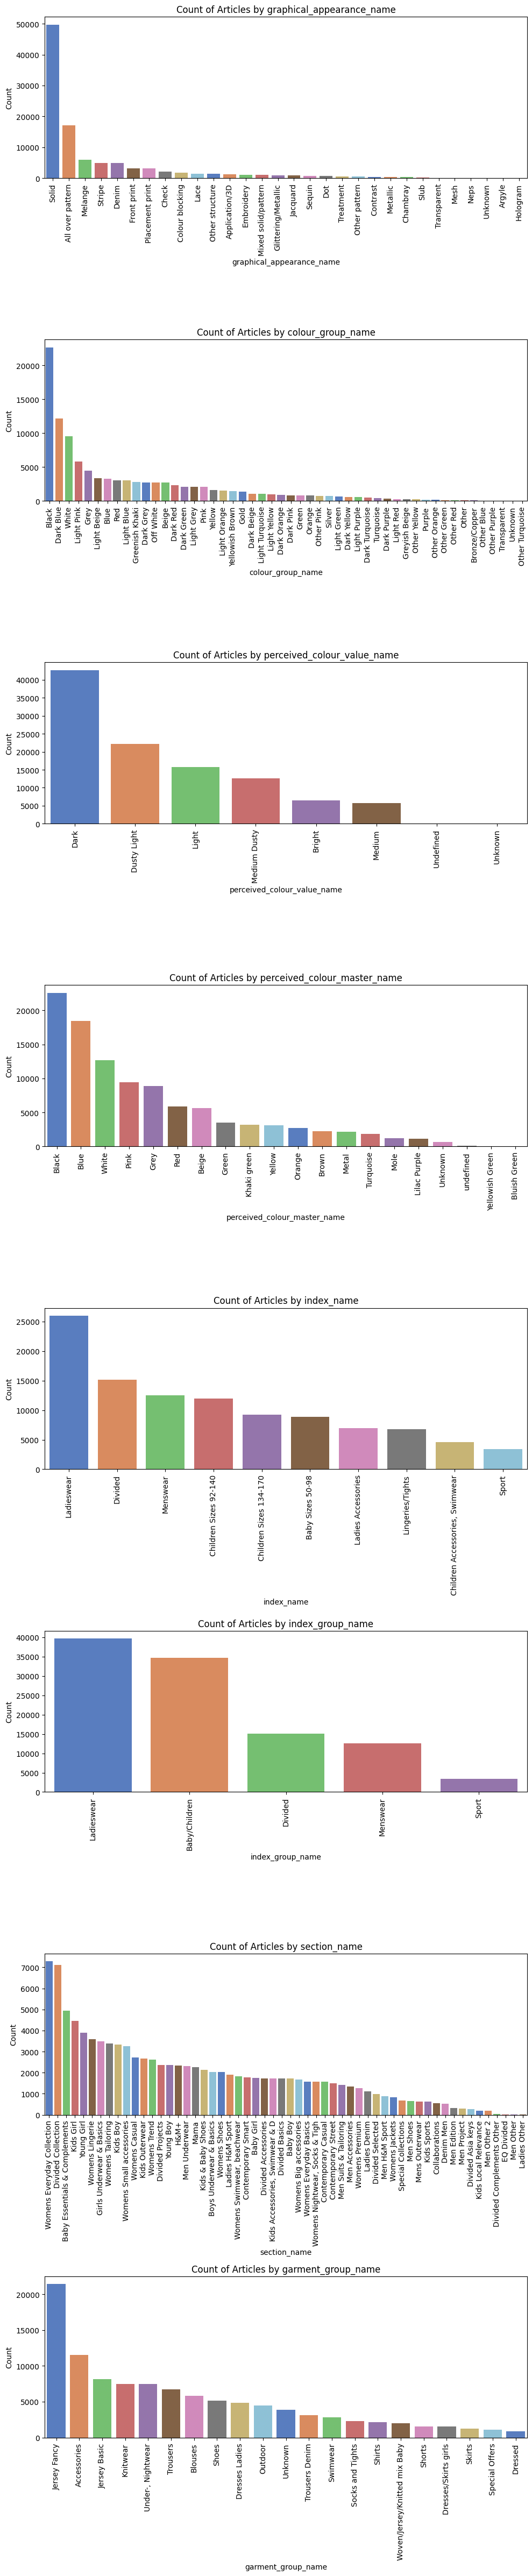

In [33]:
columns = ["graphical_appearance_name", "colour_group_name", "perceived_colour_value_name",
                    "perceived_colour_master_name", "index_name",
                    "index_group_name", "section_name", "garment_group_name"]

fig, axs = plt.subplots(len(columns), 1, figsize=(10, 6*len(columns)))

for i, column in enumerate(columns):
    counts = articles_df[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axs[i],hue=counts.index, palette='muted')
    axs[i].set_title(f'Count of Articles by {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


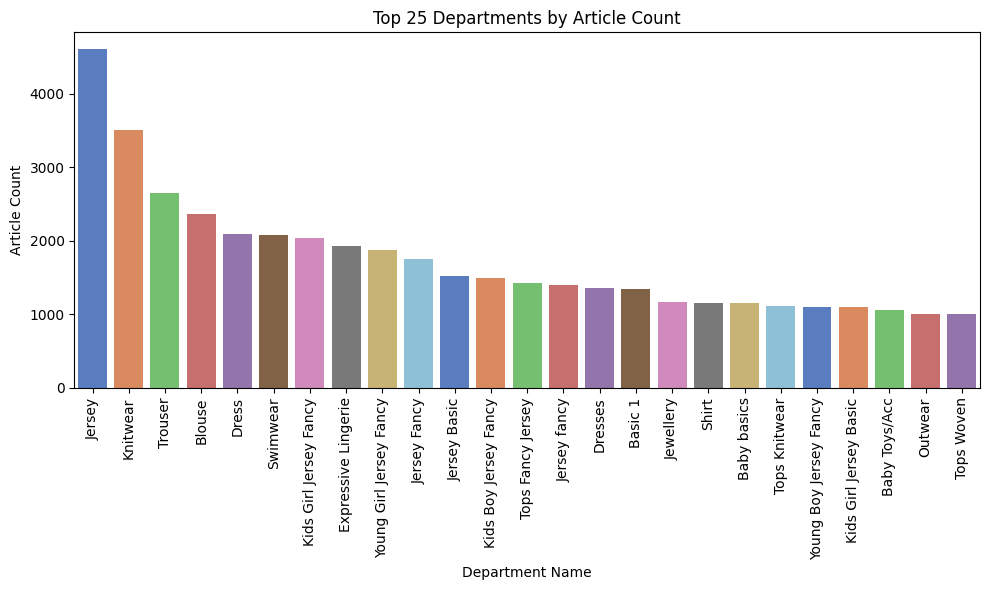

In [34]:
department_counts = articles_df['department_name'].value_counts()
department_counts_sorted = department_counts.sort_values(ascending=False)
top_25_departments = department_counts_sorted.head(25)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_25_departments.index, y=top_25_departments.values,hue=top_25_departments.index, palette='muted')
plt.title('Top 25 Departments by Article Count')
plt.xlabel('Department Name')
plt.ylabel('Article Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# EDA Transactions

In [35]:
transactions_df.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [36]:
print(transactions_df.dtypes)

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object


In [37]:
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])

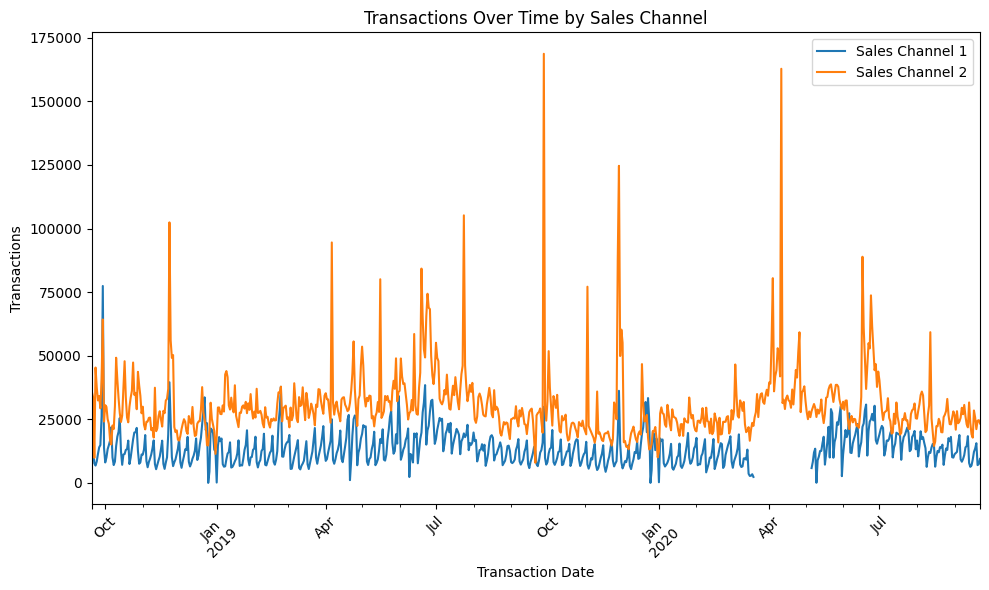

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

# Group transactions by date and sales_channel_id, and count the number of transactions per date and channel
transaction_counts_by_channel = transactions_df.groupby(['t_dat', 'sales_channel_id']).size().unstack()

# separate line for each sales_channel_id
for channel_id, counts in transaction_counts_by_channel.items():
    counts.plot(ax=ax, label=f'Sales Channel {channel_id}', linestyle='-')

ax.set_xlabel('Transaction Date')
ax.set_ylabel('Transactions')
ax.set_title('Transactions Over Time by Sales Channel')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
print(transactions_df['article_id'].nunique())

104547


In [40]:
df1=transactions_df[['article_id','customer_id']]
df2=articles_df[['article_id','prod_name','product_type_name','graphical_appearance_name','garment_group_name','section_name','department_name']]

In [41]:
df3 = pd.merge(df1, df2, on='article_id', how='inner')

In [42]:
df3.head(5)

,article_id,customer_id,prod_name,product_type_name,graphical_appearance_name,garment_group_name,section_name,department_name
0,663713001,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Atlanta Push Body Harlow,Underwear body,Solid,"Under-, Nightwear",Womens Lingerie,Expressive Lingerie
1,541518023,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Rae Push (Melbourne) 2p,Bra,Solid,"Under-, Nightwear",Womens Lingerie,Casual Lingerie
2,505221004,00007d2de826758b65a93dd24ce629ed66842531df6699...,Inca Jumper,Sweater,Melange,Knitwear,Divided Selected,Tops Knitwear DS
3,685687003,00007d2de826758b65a93dd24ce629ed66842531df6699...,W YODA KNIT OL OFFER,Sweater,Melange,Special Offers,Womens Everyday Collection,Campaigns
4,685687004,00007d2de826758b65a93dd24ce629ed66842531df6699...,W YODA KNIT OL OFFER,Sweater,Melange,Special Offers,Womens Everyday Collection,Campaigns


In [43]:
pd_articles = df3.groupby('customer_id')['product_type_name'].agg(list)

In [44]:
pd_articles

customer_id
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657    [Jacket, Hoodie, Jacket, Jumpsuit/Playsuit, Bl...
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa    [Dress, Shirt, Skirt, Sweater, Sweater, Dress,...
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318    [Underwear body, Bra, Underwear body, Blouse, ...
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e                                           [Bra, Bra]
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a    [Blouse, Sweater, Bikini top, Swimwear bottom,...
                                                                                          ...                        
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831    [Swimsuit, Bikini top, Dress, Bikini top, Biki...
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7    [Boots, Trousers, Trousers, Trousers, Sweater,...
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6

In [45]:
pd_articles_df = pd_articles.reset_index()
pd_articles_df.columns = ['id', 'item']

In [46]:
pd_articles_df

,id,item
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,"[Jacket, Hoodie, Jacket, Jumpsuit/Playsuit, Bl..."
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,"[Dress, Shirt, Skirt, Sweater, Sweater, Dress,..."
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,"[Underwear body, Bra, Underwear body, Blouse, ..."
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,"[Bra, Bra]"
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,"[Blouse, Sweater, Bikini top, Swimwear bottom,..."
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,"[Swimsuit, Bikini top, Dress, Bikini top, Biki..."
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,"[Boots, Trousers, Trousers, Trousers, Sweater,..."
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,"[Trousers, Leggings/Tights, Leggings/Tights, S..."
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,"[Underwear bottom, Pyjama set, Trousers, Dress..."


In [47]:
# min support = 40%
# total possible rules = 3^d-2^(d+1)+1


In [48]:
exploded_items = pd_articles_df['item'].explode()
unique_items_count = exploded_items.nunique()
print(unique_items_count)

130


In [49]:
d=unique_items_count
total_rules = 3**d - 2**(d + 1) + 1
print("Total possible rules:", total_rules)

Total possible rules: 106111661199647248543685133493777300483396197333623115836181002


In [50]:
#onehot = pd.get_dummies(pd_articles_df['item'])

In [51]:
#frequent_itemsets = apriori(onehot, min_support=0.4, use_colnames=True)
#rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
#filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['support'] >= 0.4)]

#print(filtered_rules)